In [1]:
import pandas as pd
from scipy.io import arff

# Caricamento dei dati
data = arff.loadarff('Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data[0])



df.dtypes
print("Dimensione:",df.shape)
df.head()

Dimensione: (3810, 8)


Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent      Class  
0      15617.0  0.572896  b'Cammeo'  
1      15072.0  0.615436  b'Cammeo'  
2      14954.0  0.693259  b'Cammeo'  
3      13368.0  0.640669  b'Cammeo'  
4      15262.0  0.646024  b'Cammeo'

In [2]:
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

class_dummies = pd.get_dummies(df['Class'],prefix="Class")


df = pd.concat([df, class_dummies], axis=1)


df.drop('Class', axis=1, inplace=True)
print("Dimensione:",df.shape)
df.head()


Dimensione: (3810, 9)


C:\Users\feder\AppData\Local\Temp\ipykernel_14956\2737304901.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  Class_Cammeo  Class_Osmancik  
0      15617.0  0.572896          True           False  
1      15072.0  0.615436          True           False  
2      14954.0  0.693259          True           False  
3      13368.0  0.640669          True           False  
4      15262.0  0.646024          True           False

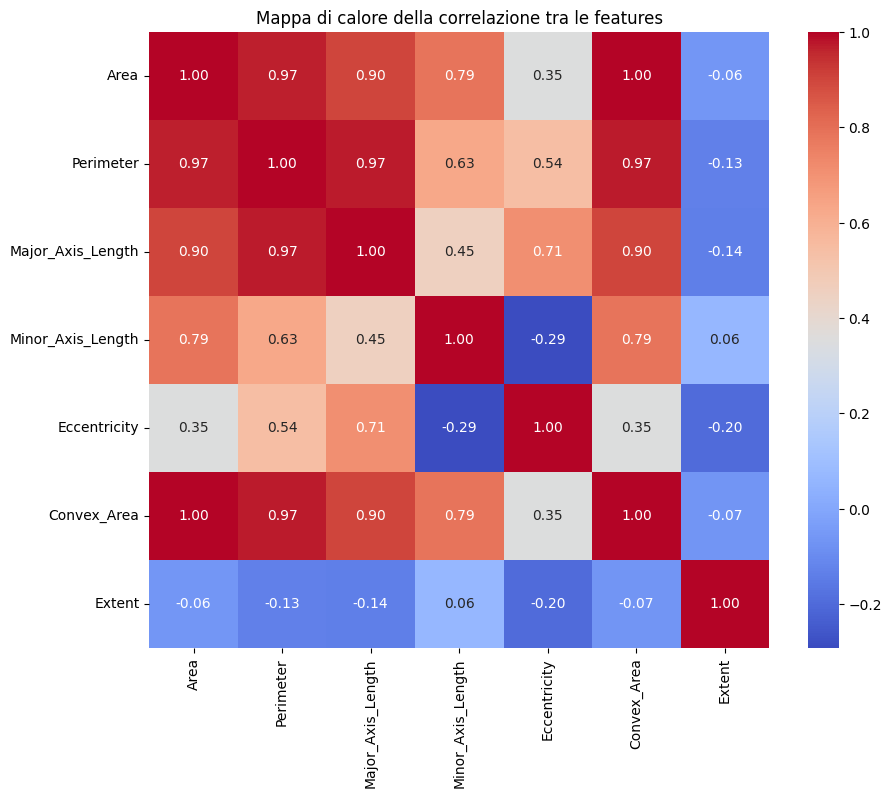

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
df_without_class = df.iloc[:, :-2]
correlation_matrix = df_without_class.corr()

# Creazione della mappa di calore
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mappa di calore della correlazione tra le features')
plt.show()


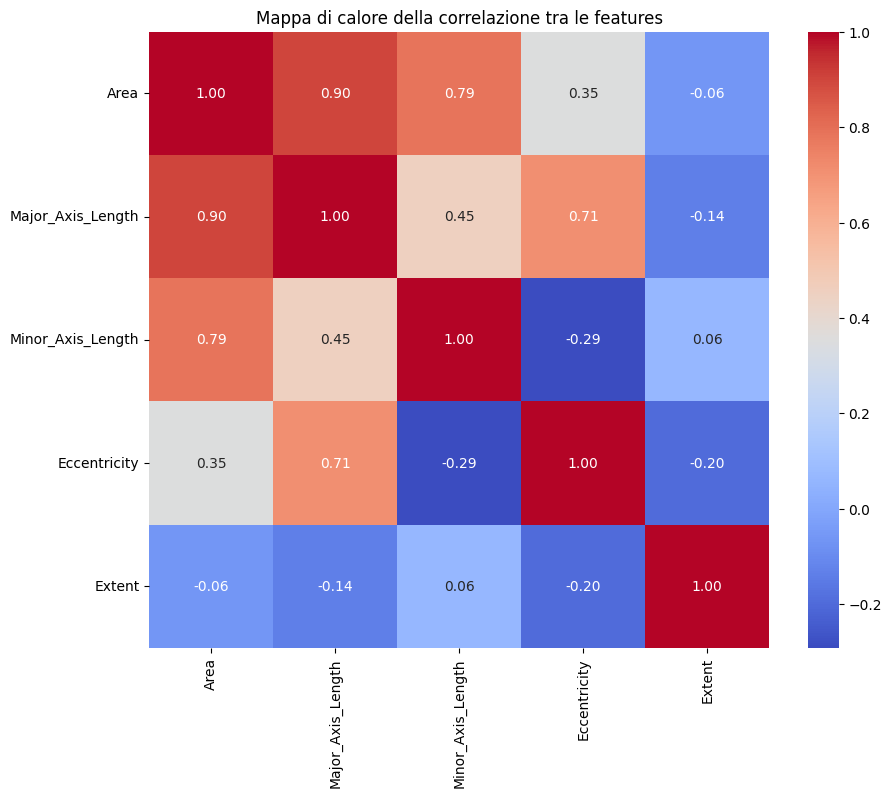

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144753         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050  12706.500000     0.645361  
75%        0.902588  14284.000000     0.726562  
max        0.948007  19099.000000     0.861050

In [4]:
df_without_class.drop('Convex_Area', axis=1, inplace=True)
df_without_class.drop('Perimeter', axis=1, inplace=True)
correlation_matrix2 = df_without_class.corr()

# Creazione della mappa di calore
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mappa di calore della correlazione tra le features')
plt.show()
df.describe()

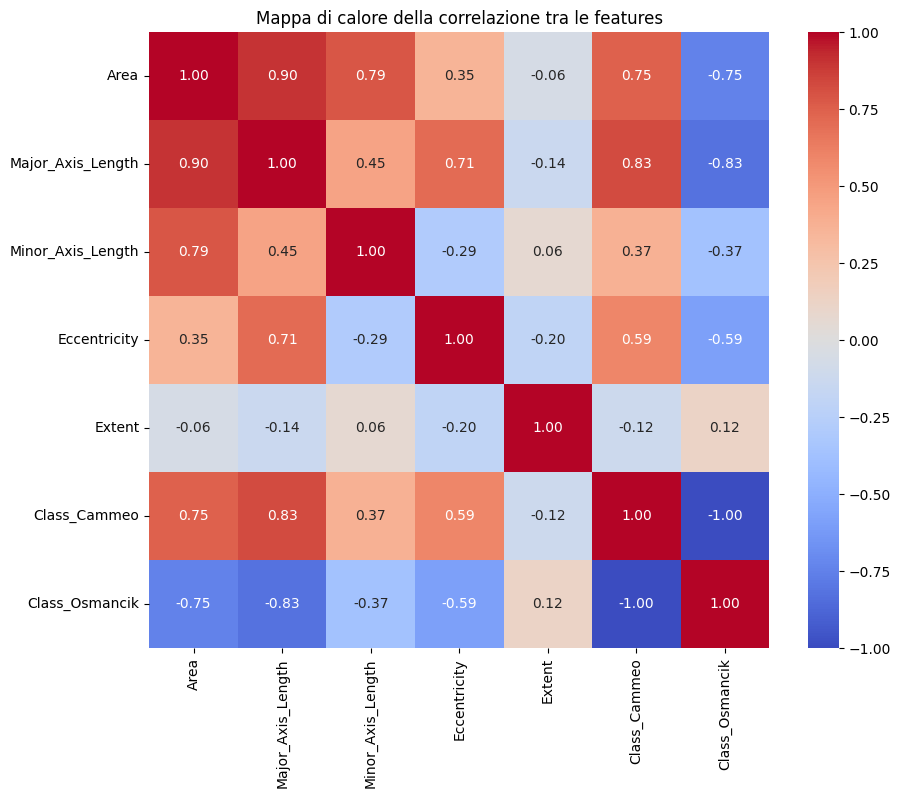

Area  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
count   3810.000000        3810.000000        3810.000000   3810.000000   
mean   12667.727559         188.776222          86.313750      0.886871   
std     1732.367706          17.448679           5.729817      0.020818   
min     7551.000000         145.264465          59.532406      0.777233   
25%    11370.500000         174.353855          82.731695      0.872402   
50%    12421.500000         185.810059          86.434647      0.889050   
75%    13950.000000         203.550438          90.143677      0.902588   
max    18913.000000         239.010498         107.542450      0.948007   

            Extent  
count  3810.000000  
mean      0.661934  
std       0.077239  
min       0.497413  
25%       0.598862  
50%       0.645361  
75%       0.726562  
max       0.861050

In [5]:
df.drop('Convex_Area', axis=1, inplace=True)
df.drop('Perimeter', axis=1, inplace=True)
correlation_matrix2 = df.corr()

# Creazione della mappa di calore
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mappa di calore della correlazione tra le features')
plt.show()
df.describe()

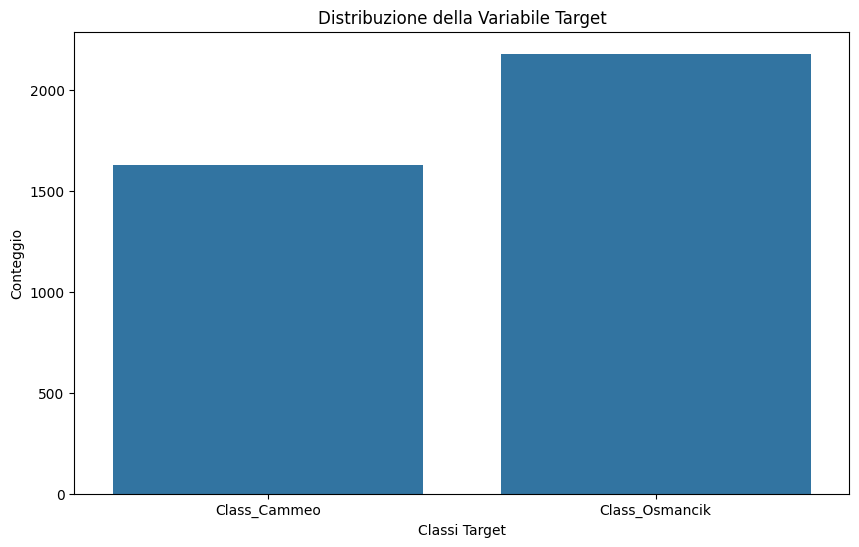

In [6]:
target_counts = df.filter(regex='Class_').sum().sort_values()

# Creazione del plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribuzione della Variabile Target')
plt.ylabel('Conteggio')
plt.xlabel('Classi Target')
plt.xticks(rotation=0)  # Ruota i nomi delle classi per una migliore leggibilità
plt.show()

Random Forest CV accuracy scores: [0.92650919 0.95800525 0.93700787 0.93963255 0.9343832  0.9160105
 0.92913386 0.9343832  0.86614173 0.90026247]
Random Forest CV average accuracy: 0.9241469816
XGBoost CV accuracy scores: [0.92913386 0.96062992 0.94488189 0.93700787 0.93700787 0.91863517
 0.91338583 0.92913386 0.87664042 0.88976378]
XGBoost CV average accuracy: 0.9236220472


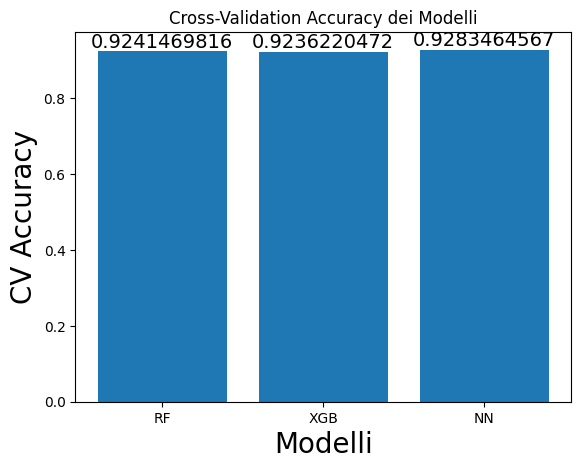

Index(['Area', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity',
       'Extent', 'Class_Cammeo', 'Class_Osmancik'],
      dtype='object')

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
from lime import lime_tabular
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# Definire il numero di fold per la cross-validation
cv_folds = 10
X = df.drop(columns=df.filter(regex='Class_').columns)
y = df['Class_Osmancik'].astype(int)
# Inizializzazione dei modelli
rf =RandomForestClassifier(
    n_estimators=200, # Numero di alberi nella foresta.
    max_depth=10, # Massima profondità dell'albero.
    min_samples_split=2, # Numero minimo di campioni richiesti per dividere un nodo interno.
    random_state=42
)
xgb = XGBClassifier(
    n_estimators=50, # Numero di alberi.
    learning_rate=0.1, # Tasso di apprendimento.
    max_depth=None, # Massima profondità dell'albero.
    random_state=42
)
# Cross-validation per Random Forest
rf_cv_scores = cross_val_score(rf, X, y, cv=cv_folds, scoring='accuracy')
print(f'Random Forest CV accuracy scores: {rf_cv_scores}')
print(f'Random Forest CV average accuracy: {rf_cv_scores.mean():.10f}')

# Cross-validation per XGBoost
xgb_cv_scores = cross_val_score(xgb, X, y, cv=cv_folds, scoring='accuracy')
print(f'XGBoost CV accuracy scores: {xgb_cv_scores}')
print(f'XGBoost CV average accuracy: {xgb_cv_scores.mean():.10f}')

# Cross-validation per Neural Network MANCA PREPROCESSING
#nn_cv_scores = cross_val_score(nn, X, y, cv=cv_folds, scoring='accuracy')
#print(f'Neural Network CV accuracy scores: {nn_cv_scores}')
#print(f'Neural Network CV average accuracy: {nn_cv_scores.mean():.10f}')

# Definizione del pipeline
pipelineNN = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # NO MISSING VALUES
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier( hidden_layer_sizes=(100,),activation='relu', 
    solver='adam',
    alpha=0.0001,random_state=42))
])

# Divisione dei dati in features e target, assicurati che X e y siano definiti correttamente
# X = df.drop('target_column_name', axis=1)
# y = df['target_column_name']

# Configurazione della cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcolo dei cross-validation scores
cv_scores = cross_val_score(pipelineNN, X, y, cv=cv_strategy, scoring='accuracy')

# Calcolo della media e dello standard deviation degli scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Creare un grafico a barre per mostrare l'accuracy media della cross-validation per ogni modello
cv_accuracies = [rf_cv_scores.mean(), xgb_cv_scores.mean(), cv_scores.mean()]
bars = plt.bar(['RF', 'XGB', 'NN'], cv_accuracies)
plt.title('Cross-Validation Accuracy dei Modelli')
plt.ylabel('CV Accuracy', size=20)
plt.xlabel('Modelli', size=20)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.10f}', ha='center', va='bottom', color='black', size=14)

plt.show()
df.columns

In [8]:
#### GRID SEARCH
# from sklearn.model_selection import GridSearchCV

## Per il RandomForestClassifier
#### param_grid = {
####  'n_estimators': [50, 100, 200],
####  'max_depth': [None, 10, 20, 30],
####  'learning_rate':[0.1,0.2,0.3,0.4]
####   # Altri iperparametri potenziali da ottimizzare...
#### }

#### CV_rfc = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)
#### CV_rfc.fit(X_train, y_train)
#### print(CV_rfc.best_params_)

# XAI:

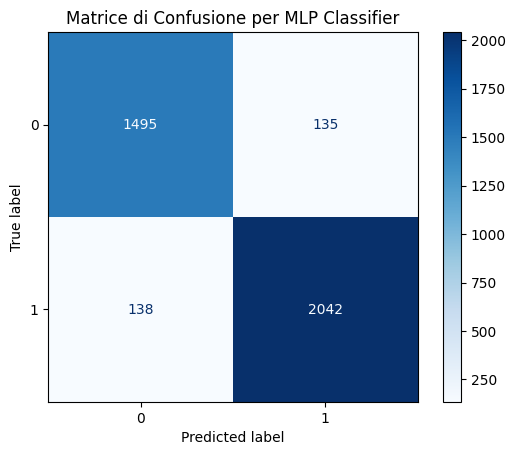

In [9]:
import lime
import pandas as pd
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Inizializzazione del pipeline
pipelineNN = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                          solver='adam', alpha=0.0001, random_state=42))
])

# Configurazione della cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Liste per raccogliere i veri valori e le predizioni
true_labels = []
predictions = []

# Esecuzione della cross-validation
for train_index, test_index in cv_strategy.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    pipelineNN.fit(X_train, y_train)
    preds = pipelineNN.predict(X_test)
    
    true_labels.extend(y_test)
    predictions.extend(preds)

# Calcolo della matrice di confusione
cm = confusion_matrix(true_labels, predictions)

# Visualizzazione della matrice di confusione
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice di Confusione per MLP Classifier')
plt.show()

#### Permutare

<Figure size 1000x800 with 0 Axes>

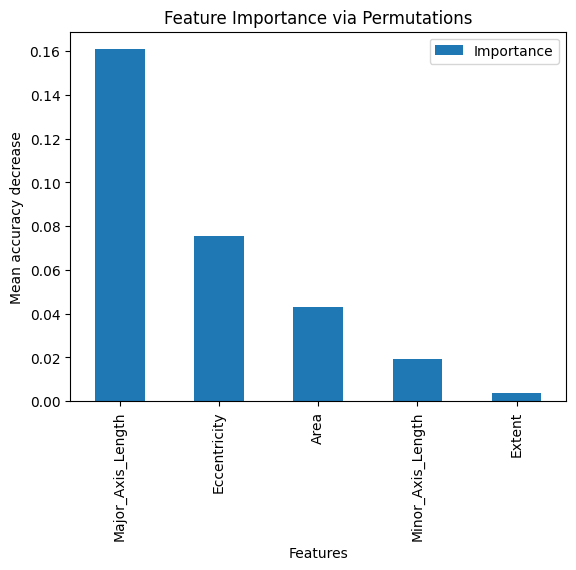

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
result = permutation_importance(pipelineNN, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_importances = pd.DataFrame(result.importances_mean, index=X_train.columns, columns=['Importance'])
perm_importances.sort_values(by="Importance", ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
perm_importances.plot(kind='bar')
plt.title('Feature Importance via Permutations')
plt.ylabel('Mean accuracy decrease')
plt.xlabel('Features')
plt.show()

#### SHAP

In [11]:
import shap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [12]:
def model_predict(data):
    return pipelineNN.predict_proba(data)[:, 1]  # Assumendo che vuoi la probabilità della classe positiva CAPIRE STO CODICE

# Creiamo un Explainer SHAP che utilizza la funzione sopra
explainer = shap.KernelExplainer(model_predict, X_train)#Explainer

# Calcoliamo i valori SHAP per il test set
shap_values = explainer(X_test)

# Visualizziamo un summary plot per i valori SHAP
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)

Using 2857 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/953 [00:00<?, ?it/s]

KeyboardInterrupt: 

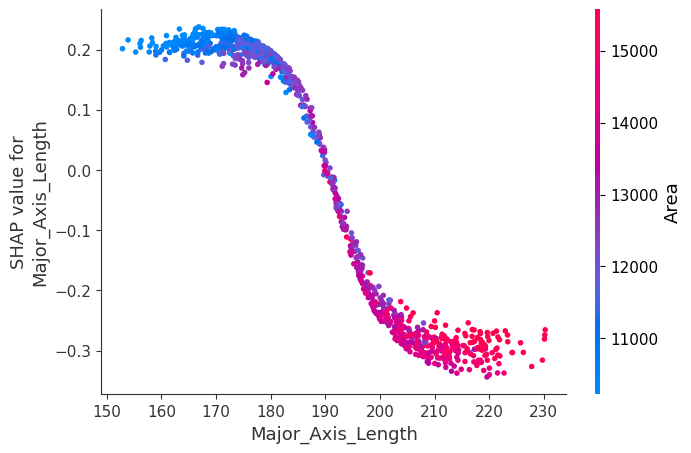

In [ ]:
shap.dependence_plot("Major_Axis_Length", shap_values.values, X_test, feature_names=X.columns, interaction_index='Area')

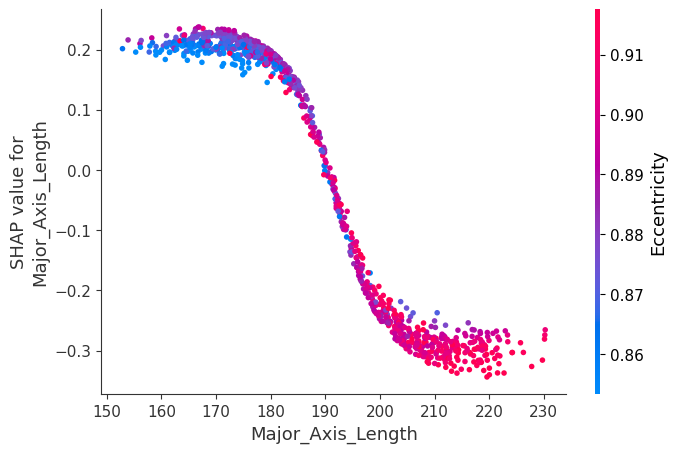

In [ ]:
shap.dependence_plot("Major_Axis_Length", shap_values.values, X_test, feature_names=X.columns, interaction_index='Eccentricity')

In [ ]:
# Visualizza il force plot per la prima istanza del test set
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[1], X_test.iloc[1])



In [ ]:
shap.force_plot(explainer.expected_value, shap_values.values[45], X_test.iloc[45])


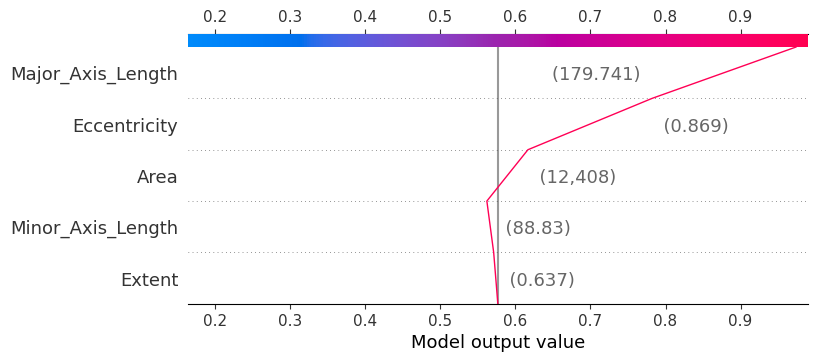

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values.values[1], X_test.iloc[1])


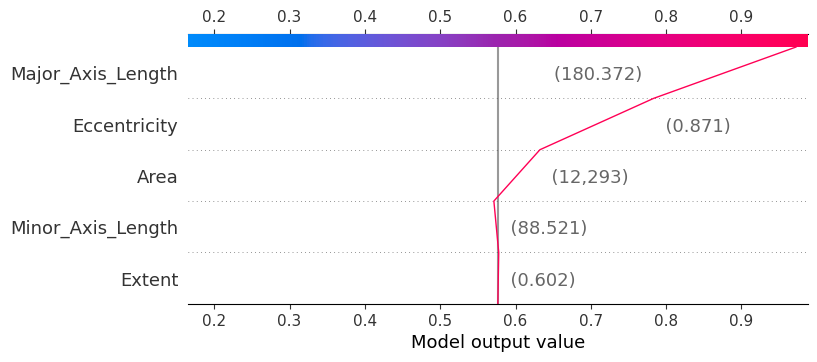

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values.values[50], X_test.iloc[50])

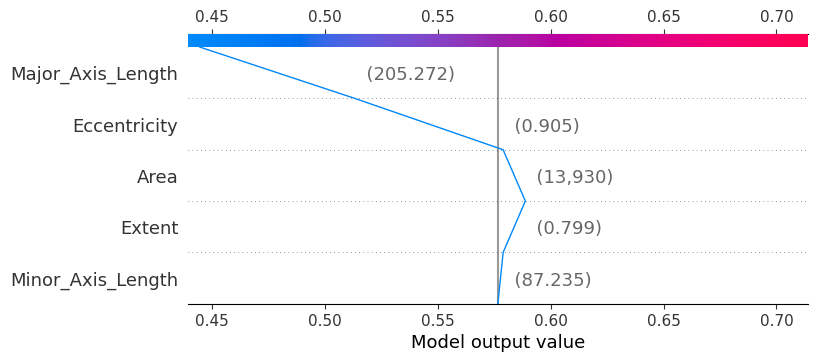

In [ ]:
import numpy as np
import shap
import random
# Supponiamo che shap_values.values sia un array numpy e X_test un DataFrame di pandas.
# Determina il numero di osservazioni casuali da plottare.
num_samples = 20
np.random.seed(41)
# Genera un array di indici casuali dalla lunghezza dei valori SHAP.
random_indices = np.random.choice(shap_values.values.shape[0], num_samples, replace=False)

# Seleziona le osservazioni corrispondenti sia per i valori SHAP che per i dati di test.
shap_values_subset = shap_values.values[random_indices]
X_test_subset = X_test.iloc[random_indices]

# Ora utilizza questi sottoinsiemi per plottare il decision plot.
shap.decision_plot(explainer.expected_value, shap_values.values[20], X_test_subset)

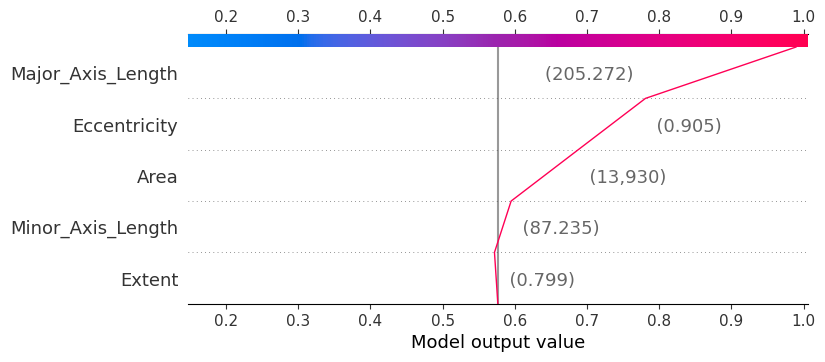

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values.values[25], X_test_subset)

In [ ]:
shap.decision_plot(shap_values, X_test, feature_names=X_train.columns)
# Visualizziamo un summary plot per i valori SHAP
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)

TypeError: The shap_values arg is the wrong type. Try explainer.shap_values().

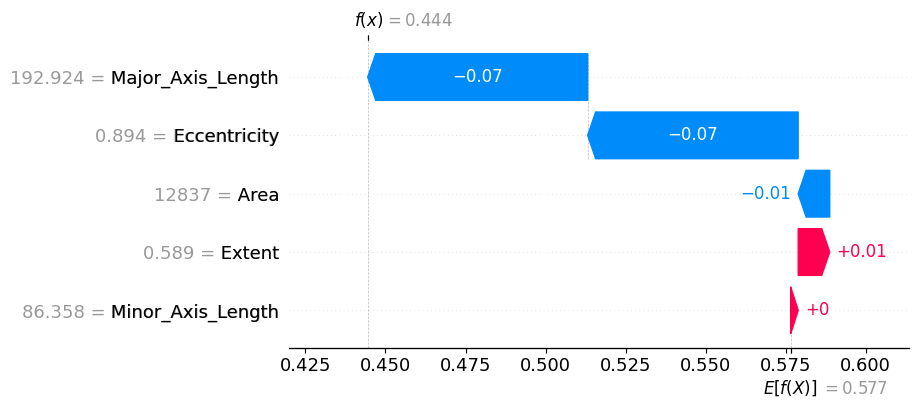

In [ ]:
shap.plots.waterfall(shap_values[20], max_display=10)

In [ ]:
#shap.summary_plot(shap_values, X_test)

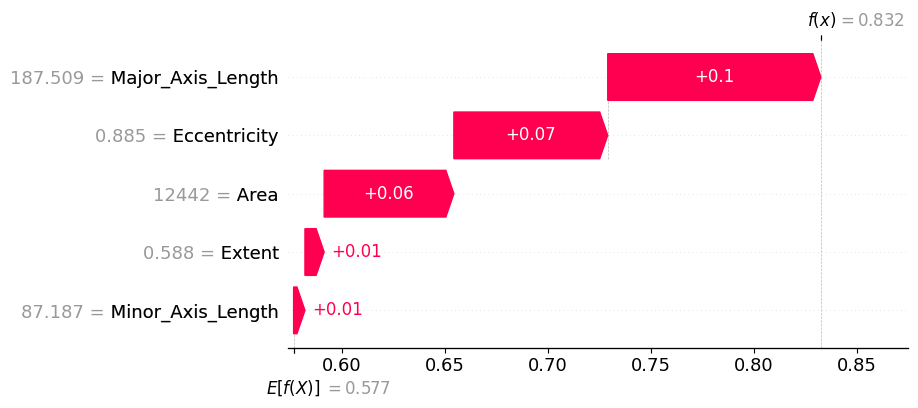

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=10)

#### LIME

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Create a LIME Tabular Explainer
explainer2 = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns,
                                 class_names=['Cammeo','Osmancik'],
                                 discretize_continuous=True)
#exp = explainer.explain_instance(df_test.iloc)
# Explain a prediction
n=3
for i in range(n) :

    exp = explainer2.explain_instance(X_test.iloc[i].values,
                                 pipelineNN.predict_proba,
                                 num_features=len(X.columns))
# Show the explanation
    print("Instance:", i)
    print("True class:", y_test.iloc[i])
    exp.as_list()
    exp.show_in_notebook(show_table=True)




Instance: 0
True class: 0


Instance: 1
True class: 1


Instance: 2
True class: 1


In [39]:
i=45
exp = explainer2.explain_instance(X_test.iloc[i].values,
                                 pipelineNN.predict_proba,
                                 num_features=len(X.columns))
print("Instance:", i)
print("True class:", y_test.iloc[i])
exp.as_list()
exp.show_in_notebook(show_table=True)


Instance: 45
True class: 0
